# 1.0 Imports

In [1]:
import pandas as pd
import inflection
import math
import datetime
import matplotlib.pyplot as plt

## 1.1 Importação dos 1os dados

In [2]:
df_sales_raw = pd.read_csv('train.csv',low_memory=False)
print(df_sales_raw.head(3), df_sales_raw.shape)

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1   (1017209, 9)


In [3]:
df_sales_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [4]:
df_sales_raw = df_sales_raw.iloc[:812046,:]

## 1.2 Importação dos 2os dados

In [5]:
df_store_raw = pd.read_csv('store.csv',low_memory=False)
print(df_store_raw.head(3), '\n' ,'\nShape:', df_store_raw.shape)

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct   
 
Shape: (1115, 10)


In [6]:
df_store_raw.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

# 2.0 Merge dos dois conjuntos de dados

In [7]:
df_raw = pd.merge(df_sales_raw,df_store_raw,how='left',on='Store')
print(df_raw.head(), '\n' ,'\nShape:', df_raw.shape)

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

# 3.0 Fatiando os dados para poupar memória e viabilizar o processamento

In [8]:
df_raw = df_raw.iloc[:812046,:]

# 4.0 Descrição e formatação dos dados

## 4.1 Fazendo uma cópia do arquivo original

In [9]:
df1 = df_raw.copy()

In [10]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 4.2 Redefinindo as colunas de CamelCase pra sneakcase

In [11]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list( map( snakecase,cols_old ) )

df1.columns = cols_new

In [12]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 4.3 Identificando os tipos de dados

In [13]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

## 4.4 Mudando o formato da coluna "date"  

In [14]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# 5.0 Identificação e tratamento de NAs

In [15]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2090
competition_open_since_month    258209
competition_open_since_year     258209
promo2                               0
promo2_since_week               407933
promo2_since_year               407933
promo_interval                  407933
dtype: int64

## 5.1 Tratamento dos NAs

In [16]:
# competition_distance              2090
# competition_open_since_month    258209
# competition_open_since_year     258209
# promo2_since_week               407933
# promo2_since_year               407933
# promo_interval                  407933

## 5.2 Tratando dos NAs na coluna "competition_distance"

In [17]:
df1['competition_distance'].max()

75860.0

In [18]:
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: ((75860.0) * 5) if math.isnan( x ) else x )

In [19]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    258209
competition_open_since_year     258209
promo2                               0
promo2_since_week               407933
promo2_since_year               407933
promo_interval                  407933
dtype: int64

## 5.3 Tratando dos NAs na coluna "competition_open_since_month/year/week"

In [20]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
183857,998,2,2015-02-17,2354,255,1,1,0,0,a,a,780.0,9.0,2005.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [21]:
# Substituir os valores NAN da coluna "competition_open_since_month" pelo mês da venda extraído da coluna "date"
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'],axis=1)

In [22]:
# Substituir os valores NAN da coluna "competition_open_since_year" pelo ano da venda extraído da coluna "date"
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'],axis=1)

## 5.4 Remoção dos NANs da Promo2_since_week

In [23]:
# promo2_since_week
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'] , axis =1 )

In [24]:
# promo2_since_year
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'] , axis =1 )

In [25]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month         0
competition_open_since_year          0
promo2                               0
promo2_since_week                    0
promo2_since_year                    0
promo_interval                  407933
dtype: int64

In [26]:
# Promo interval
# Criação de um dicionário com as chaves antigas e as palavras dos meses para serem atualizados
month_map = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# Intervalor de promoção para substituir os NANs por zero na coluna promo_interval
df1['promo_interval'].fillna(0,inplace=True)

# Aplicando o método map na coluna 'date' para no dicionário month_map
df1['month_map'] = df1['date'].dt.month.map( month_map )

In [27]:
df1.head(5).T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


In [28]:
df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0 , axis = 1) 

In [29]:
df1.sample(10).T

,166640,180866,185234,589487,67038,476824,19998,129455,547970,677265
store,506,237,145,438,139,390,1044,116,176,131
day_of_week,3,4,7,7,1,3,2,1,2,5
date,2015-03-04 00:00:00,2015-02-19 00:00:00,2015-02-15 00:00:00,2014-01-19 00:00:00,2015-06-01 00:00:00,2014-04-30 00:00:00,2015-07-14 00:00:00,2015-04-06 00:00:00,2014-02-25 00:00:00,2013-11-01 00:00:00
sales,9004,4589,0,0,9336,18217,6687,0,3758,0
customers,963,634,0,0,594,1538,893,0,584,0
open,1,1,0,0,1,1,1,0,1,0
promo,1,1,0,0,1,1,1,0,0,0
state_holiday,0,0,0,0,0,0,0,b,0,a
school_holiday,0,0,0,0,1,0,0,1,0,1
store_type,a,a,a,d,a,a,c,a,a,c


In [30]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

# 6.0 Modificando o tipo de Dados do dataframe

In [31]:
# Visualizando os tipos de dados de cada coluna
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [32]:
## Convertendo os dados de float para int através do método .astype( int )

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

In [33]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 6.0 Estatística Descritiva dos Dados

In [34]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## Separando os dados entre classe numérica através da função 
## .select_dtypes(include = [' '] )
## Separando os dados entre classe categórica através da função 
## .select_dtypes(exclude = [' '] )

In [35]:
num_attributes = df1.select_dtypes( include = ['int64','float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64','float64','datetime64[ns]'])

In [36]:
num_attributes.sample(5)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
628336,262,7,32058,4609,1,0,0,1180.0,0,0
659818,524,7,0,0,0,0,0,40860.0,0,0
610810,576,2,4331,645,1,0,1,50.0,0,0
360813,93,3,6803,666,1,1,0,16690.0,1,0
808428,839,7,0,0,0,0,0,240.0,0,0


In [37]:
cat_attributes.sample(5)

,state_holiday,store_type,assortment,competition_open_since_month,competition_open_since_year,promo2_since_week,promo2_since_year,promo_interval,month_map
774728,0,a,c,8,2013,18,2013,"Feb,May,Aug,Nov",Aug
505255,0,a,a,12,2011,14,2015,"Jan,Apr,Jul,Oct",Apr
206644,0,d,a,10,2000,31,2009,"Jan,Apr,Jul,Oct",Jan
493942,0,d,c,4,2014,16,2014,0,Apr
753181,0,a,a,8,2013,34,2013,0,Aug


## Cálculo da estatística do dataframe numérico

In [38]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

In [39]:
# Média
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T

# Mediana
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Desvio
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T

# Min
d2 = pd.DataFrame( num_attributes.apply( min ) ).T

# Máx
d3 = pd.DataFrame( num_attributes.apply( max ) ).T

# Range
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T

# Skew
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T

# Kurtosis
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

In [40]:
m = pd.concat( [d2,d3,d4,ct1,ct2,d1,d5,d6] ).T.reset_index()
m.sample(5)

,index,0,0,0,0,0,0,0,0
0,store,1.0,1115.0,1114.0,558.536090,558.0,321.916049,-0.001198,-1.200657
9,is_promo,0.0,1.0,1.0,0.155122,0.0,0.362021,1.905299,1.630169
1,day_of_week,1.0,7.0,6.0,4.002038,4.0,1.997766,-0.002638,-1.246345
3,customers,0.0,5494.0,5494.0,637.248570,613.0,465.183475,1.603318,7.100665
8,promo2,0.0,1.0,1.0,0.497648,0.0,0.499994,0.009408,-1.999916


In [41]:
m.columns = ' attributes min max range media mediana desvio skew kurtosis '.split()
m.head()

,attributes,min,max,range,media,mediana,desvio,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.536090,558.0,321.916049,-0.001198,-1.200657
1,day_of_week,1.0,7.0,6.0,4.002038,4.0,1.997766,-0.002638,-1.246345
2,sales,0.0,41551.0,41551.0,5840.354689,5803.0,3875.416507,0.634760,1.744352
3,customers,0.0,5494.0,5494.0,637.248570,613.0,465.183475,1.603318,7.100665
4,open,0.0,1.0,1.0,0.831960,1.0,0.373902,-1.775659,1.152968


In [42]:
# média
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
# mediana
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

In [43]:
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( kurtosis ) ).T
d6 = pd.DataFrame( num_attributes.apply( skew ) ).T

In [44]:
d_concat = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
d_concat

,index,0,0,0,0,0,0,0,0
0,store,1.0,1115.0,1114.0,558.536090,558.0,321.916049,-1.200657,-0.001198
1,day_of_week,1.0,7.0,6.0,4.002038,4.0,1.997766,-1.246344,-0.002638
2,sales,0.0,41551.0,41551.0,5840.354689,5803.0,3875.416507,1.744334,0.634759
3,customers,0.0,5494.0,5494.0,637.248570,613.0,465.183475,7.100614,1.603315
4,open,0.0,1.0,1.0,0.831960,1.0,0.373902,1.152954,-1.775656
5,promo,0.0,1.0,1.0,0.377665,0.0,0.484803,-1.745297,0.504681
6,school_holiday,0.0,1.0,1.0,0.193122,0.0,0.394748,0.417417,1.554805
7,competition_distance,20.0,379300.0,379280.0,6398.676159,2330.0,20454.952085,281.578179,15.731237
8,promo2,0.0,1.0,1.0,0.497648,0.0,0.499994,-1.999911,0.009408
9,is_promo,0.0,1.0,1.0,0.155122,0.0,0.362021,1.630152,1.905296


In [45]:
# Depois da concatenação as colunas ficam zeradas
d_concat.columns

Index(['index', 0, 0, 0, 0, 0, 0, 0, 0], dtype='object')

In [46]:
# Corrigindo as colunas do dataframe concatenado
d_concat.columns = 'attributes min max range mean median std skew kurtosis '.split()

In [47]:
d_concat

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.536090,558.0,321.916049,-1.200657,-0.001198
1,day_of_week,1.0,7.0,6.0,4.002038,4.0,1.997766,-1.246344,-0.002638
2,sales,0.0,41551.0,41551.0,5840.354689,5803.0,3875.416507,1.744334,0.634759
3,customers,0.0,5494.0,5494.0,637.248570,613.0,465.183475,7.100614,1.603315
4,open,0.0,1.0,1.0,0.831960,1.0,0.373902,1.152954,-1.775656
5,promo,0.0,1.0,1.0,0.377665,0.0,0.484803,-1.745297,0.504681
6,school_holiday,0.0,1.0,1.0,0.193122,0.0,0.394748,0.417417,1.554805
7,competition_distance,20.0,379300.0,379280.0,6398.676159,2330.0,20454.952085,281.578179,15.731237
8,promo2,0.0,1.0,1.0,0.497648,0.0,0.499994,-1.999911,0.009408
9,is_promo,0.0,1.0,1.0,0.155122,0.0,0.362021,1.630152,1.905296


In [48]:
# Alterando o nome da variável
m = d_concat
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.536090,558.0,321.916049,-1.200657,-0.001198
1,day_of_week,1.0,7.0,6.0,4.002038,4.0,1.997766,-1.246344,-0.002638
2,sales,0.0,41551.0,41551.0,5840.354689,5803.0,3875.416507,1.744334,0.634759
3,customers,0.0,5494.0,5494.0,637.248570,613.0,465.183475,7.100614,1.603315
4,open,0.0,1.0,1.0,0.831960,1.0,0.373902,1.152954,-1.775656
5,promo,0.0,1.0,1.0,0.377665,0.0,0.484803,-1.745297,0.504681
6,school_holiday,0.0,1.0,1.0,0.193122,0.0,0.394748,0.417417,1.554805
7,competition_distance,20.0,379300.0,379280.0,6398.676159,2330.0,20454.952085,281.578179,15.731237
8,promo2,0.0,1.0,1.0,0.497648,0.0,0.499994,-1.999911,0.009408
9,is_promo,0.0,1.0,1.0,0.155122,0.0,0.362021,1.630152,1.905296


In [49]:
import seaborn as sns

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


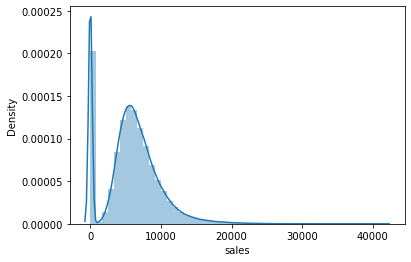

In [50]:
sns.distplot( df1['sales'] )
plt.show()

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


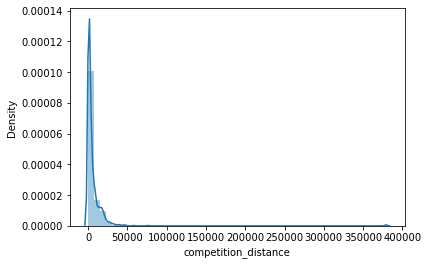

In [51]:
sns.distplot( df1['competition_distance'] )
plt.show()

## Atributos categóricos

In [52]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_map                       12
dtype: int64

In [53]:
num_attributes

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
0,1,5,5263,555,1,1,1,1270.0,0,0
1,2,5,6064,625,1,1,1,570.0,1,1
2,3,5,8314,821,1,1,1,14130.0,1,1
3,4,5,13995,1498,1,1,1,620.0,0,0
4,5,5,4822,559,1,1,1,29910.0,0,0
...,...,...,...,...,...,...,...,...,...,...
812041,1107,4,7592,764,1,1,0,1400.0,1,1
812042,1108,4,7147,720,1,1,0,540.0,0,0
812043,1109,4,5678,502,1,1,0,3490.0,1,1
812044,1110,4,4458,550,1,1,1,900.0,0,0


In [54]:
df1['state_holiday'].unique()[1:]

array(['a', 'b', 'c'], dtype=object)

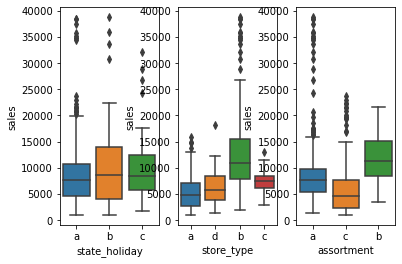

In [55]:
aux1 = df1[ ( df1['state_holiday'] != '0' ) & ( df1['sales'] > 0 ) ]

plt.subplot( 1, 3 , 1 )
sns.boxplot( x = 'state_holiday' , y = 'sales', data = aux1 )

plt.subplot( 1, 3 , 2 )
sns.boxplot( x = 'store_type' , y = 'sales', data = aux1 )

plt.subplot( 1, 3 , 3 )
sns.boxplot( x = 'assortment' , y = 'sales', data = aux1 )
plt.show()

# 7.0 FEATURE ENGINEERING

## 7.1 - Mind Map das Features envolvidas no problema

![](Daily_Store_Sales.PNG)

## 7.2 Formulação de hipóteses para as features

## 7.2.1 - Features envolvendo as lojas

### 1. Quanto maior o número de funcionarios, maiores as vendas
### 2. Quanto mais estoque a loja tem, maiores são as vendas
### 3. Quanto maior for o tamanho da loja, maiores as vendas
### 4. Quanto maior a variedade que a loja oferece, maiores as vendas
### 5. Quanto mais competidodes próximos a loja tem, menores as vendas
### 6. Lojas com competidores a mais tempo deveriam vender mais.

## 7.2.2 - Features envolvendo o produto

### 1. Lojas que investem mais em Marketing deveriam vender mais.
### 2. Lojas com maior exposição deveriam vender mais.
### 3. Lojas com o produto de menor preço deveriam vender mais.
### 4. Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.
### 5. Lojas com promoções ativas por mais tempo deveriam vender mais.
### 6. Lojas com mais dias de promoção deveriam vender mais.
### 7. Lojas com mais promoções consecutivas deveriam vender mais.

## 7.2.3 - Features envolvendo o tempo/datas

### 1. Lojas abertas durante o feriado de natal deveriam vender mais.
### 2. Lojas deveriam vender mais ao longo dos anos.
### 3. Lojas deveriam vender mais no 2o semestre do ano.
### 4. Lojas deveriam vender mais depois do dia 10 de cada mês
### 5. Lojas deveriam vender menos aos finais de semana.
### 6. Lojas deveriam vender menos durante os feriados escolares.

## 7.3.4 - Lista de premissas sobre as features que tem nos dados

### 1. Quanto maior a variedade que a loja oferece, maiores as vendas
### 2. Quanto mais competidodes próximos a loja tem, menores as vendas
### 3. Lojas com competidores a mais tempo deveriam vender mais.
### 4. Lojas com promoções ativas por mais tempo deveriam vender mais.
### 5. Lojas com mais dias de promoção deveriam vender mais.
### 6. Lojas com mais promoções consecutivas deveriam vender mais.
### 7. Lojas abertas durante o feriado de natal deveriam vender mais.
### 8. Lojas deveriam vender mais ao longo dos anos.
### 9. Lojas deveriam vender mais no 2o semestre do ano.
### 10. Lojas deveriam vender mais depois do dia 10 de cada mês
### 11. Lojas deveriam vender menos aos finais de semana.
### 12. Lojas deveriam vender menos durante os feriados escolares.

## Lista de Features

In [56]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo'],
      dtype='object')

In [57]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
449063,504,7,2014-05-25,0,0,0,0,0,0,c,c,820.0,5,2014,0,21,2014,0,May,0
281577,379,4,2014-11-13,3932,490,1,1,0,0,d,a,6630.0,11,2014,0,46,2014,0,Nov,0
304634,1115,1,2014-10-20,7772,524,1,1,0,1,d,c,5350.0,10,2014,1,22,2012,"Mar,Jun,Sept,Dec",Oct,0
423966,1052,2,2014-06-17,8972,914,1,1,0,0,a,c,5080.0,6,2014,1,31,2013,"Feb,May,Aug,Nov",Jun,0
372555,725,5,2014-08-08,5418,576,1,1,0,1,d,c,17540.0,6,2012,0,32,2014,0,Aug,0


## Criando as colunas das features de tempo no formato apropriado

In [58]:
#year
df1['year'] = df1['date'].dt.year

# month
df1['month'] = df1['date'].dt.month

#day
df1['day'] = df1['date'].dt.day

#week of year
df1['week_of_year'] = df1['date'].dt.isocalendar().week

# year week
df1['year_week'] = df1['date'].dt.strftime( '%Y-%W' )

In [59]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week'],
      dtype='object')

In [60]:
# Agregando as colunas Competition since através do método datetime.datetime
# competition_open_since_month
# competition_open_since_year
df1['competition_since'] = df1.apply( lambda x: datetime.datetime(year = x['competition_open_since_year'] , month = x['competition_open_since_month'] , day = 1 ), axis = 1)

df1['competition_time_month'] = ( ( df1['date'] - df1['competition_since'] ) / 30).apply( lambda x: x.days ).astype( int )

# promo since
df1['promo_since'] = df1['promo2_since_year'].astype( str ) + '-' + df1['promo2_since_week'].astype( str )
df1['promo_since'] =  df1['promo_since'].apply( lambda x : datetime.datetime.strptime( x + '-1' , '%Y-%W-%w') - datetime.timedelta( days = 7 ) )


In [61]:
df1['promo_time_week'] = ( ( df1['date'] - df1['promo_since'] ) / 7 ).apply( lambda x: x.days ).astype( int )

In [62]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

In [63]:
df1['assortment'].sample(10)

123908    c
624773    a
196079    c
681473    a
100191    c
329143    a
464097    a
742629    a
161567    c
332651    c
Name: assortment, dtype: object

In [64]:
# Assortment
df1['assortment'] = df1['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

In [65]:
# state holiday
df1['state_holiday'] = df1['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

In [66]:
df1['state_holiday'].unique()

array(['regular_day', 'public_holiday', 'easter_holiday', 'christmas'],
      dtype=object)

# 8.0 - Filtragem de variáveis

In [67]:
df3 = df1.copy()

## 8.1 - Filtragem das linhas da coluna de vendas pra tirar os valores negativos

In [68]:
df3 = df3[( df3['open'] != 0 ) & ( df3['sales'] > 0  )]

df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 8.2 - Seleção de colunas de features relevantes

In [69]:
cols_drop = ['customers','open','promo_interval','month_map']

df3.drop( cols_drop , axis = 1 )

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812041,1107,4,2013-07-04,7592,1,regular_day,0,a,basic,1400.0,...,1,2013,7,4,27,2013-26,2012-06-01,13,2010-03-22,171
812042,1108,4,2013-07-04,7147,1,regular_day,0,a,basic,540.0,...,0,2013,7,4,27,2013-26,2004-04-01,112,2013-07-01,0
812043,1109,4,2013-07-04,5678,1,regular_day,0,c,basic,3490.0,...,1,2013,7,4,27,2013-26,2011-04-01,27,2012-05-21,58
812044,1110,4,2013-07-04,4458,1,regular_day,1,c,extended,900.0,...,0,2013,7,4,27,2013-26,2010-09-01,34,2013-07-01,0


In [70]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

In [71]:
plt.style.use('ggplot')

# Módulo 4

# 9.0 - Análise Exploratória de Dados

## 9.1 - Análise Univariada

In [72]:
df4 = df3.copy()

### Histograma das vendas

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


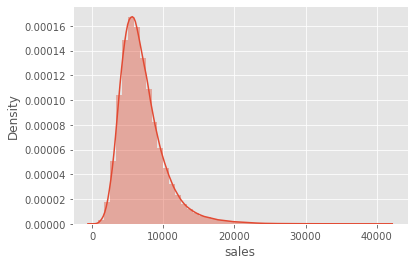

In [73]:
sns.distplot( df4['sales'] );

### 9.1.1 - Variáveis numéricas

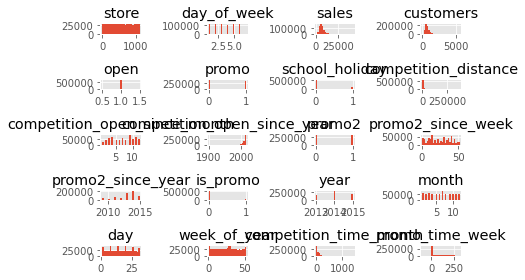

In [74]:
df4.hist(bins=25);
plt.tight_layout()

### 9.1.2 - Variáveis categóricas

In [75]:
cat_attributes.head()

,state_holiday,store_type,assortment,competition_open_since_month,competition_open_since_year,promo2_since_week,promo2_since_year,promo_interval,month_map
0,0,c,a,9,2008,31,2015,0,Jul
1,0,a,a,11,2007,13,2010,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,12,2006,14,2011,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,9,2009,31,2015,0,Jul
4,0,a,a,4,2015,31,2015,0,Jul


In [76]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [77]:
df4['state_holiday'].value_counts()

regular_day       674872
public_holiday       509
easter_holiday        98
christmas             71
Name: state_holiday, dtype: int64

In [78]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

In [79]:
df4['state_holiday'].value_counts()

regular_day       674872
public_holiday       509
easter_holiday        98
christmas             71
Name: state_holiday, dtype: int64

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

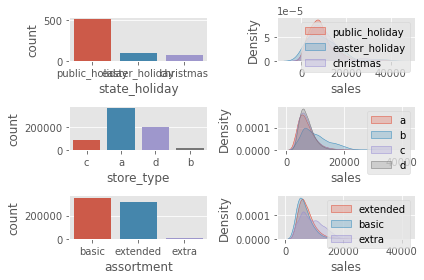

In [80]:
#state_holiday
plt.subplot( 3 , 2 , 1 )
a = df4[df4['state_holiday'] != 'regular_day'];
sns.countplot( a['state_holiday'] );
plt.tight_layout();

plt.subplot( 3 , 2 , 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', shade=True);
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday', shade=True);
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label = 'christmas', shade=True);
plt.legend();
plt.tight_layout();

#store_type
plt.subplot( 3 , 2 , 3 )
sns.countplot( df4['store_type'] );

plt.subplot( 3 , 2 , 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label = 'a', shade=True);
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label = 'b', shade=True);
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label = 'c', shade=True);
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label = 'd', shade=True);
plt.legend();
plt.tight_layout()

#assortment
plt.subplot( 3 , 2 , 5 )
sns.countplot( df4['assortment'] );

plt.subplot( 3 , 2 , 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label = 'extended', shade=True);
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label = 'basic', shade=True);
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label = 'extra', shade=True);
plt.legend();
plt.tight_layout()

## 9.2 - Análise Bivariada

### 9.2.1 - Lojas com maiores variedades deveriam vender mais

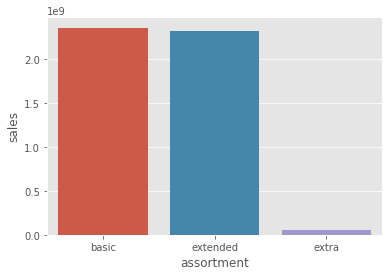

In [81]:
aux1 = df4[['assortment','sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot(x='assortment',y='sales',data=aux1);

In [82]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

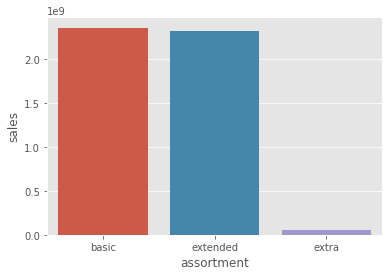

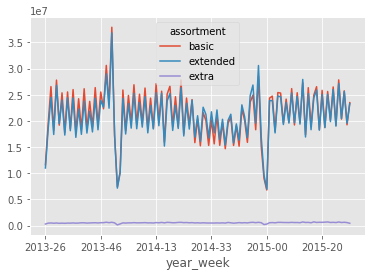

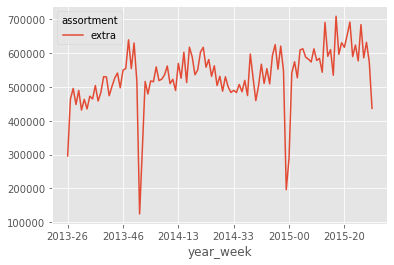

In [83]:
aux1 = df4[['assortment','sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot(x='assortment',y='sales',data=aux1);

aux2 = df4[['year_week','assortment','sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
aux2.pivot( index = 'year_week' , columns = 'assortment' , values = 'sales' ).plot();

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index = 'year_week' , columns = 'assortment' , values = 'sales' ).plot();

## 9.2.3 - Lojas com competidores mais próximos deveriam vender menos

In [84]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

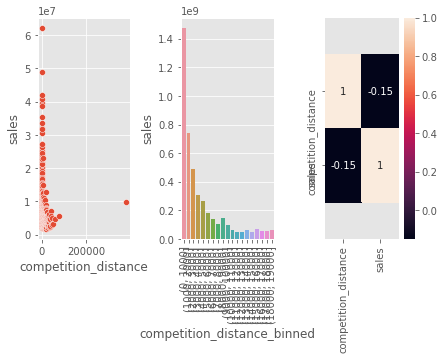

In [85]:
aux1 = df4[['competition_distance','sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x = 'competition_distance', y = 'sales' , data = aux1 );

plt.subplot( 1, 3, 2 )
bins = list( np.arange(0, 20000, 1000) )

aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'] , bins = bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

sns.barplot( x = 'competition_distance_binned' , y = 'sales' , data = aux2 );
plt.tight_layout()
plt.xticks(rotation=90)

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ) , annot=True );
bottom , top = x.get_ylim()
x.set_ylim( bottom+0.5 , top-0.5 );

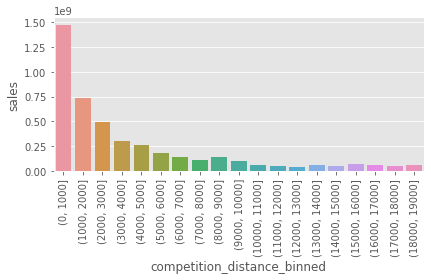

In [86]:
aux1 = df4[['competition_distance','sales']].groupby( 'competition_distance' ).sum().reset_index()

bins = list( np.arange(0, 20000, 1000) )

aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'] , bins = bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

sns.barplot( x = 'competition_distance_binned' , y = 'sales' , data = aux2 );
plt.xticks(rotation=90)
plt.tight_layout()

## 9.2.4 Lojas com competidores abertos a mais tempo deveriam vender mais.

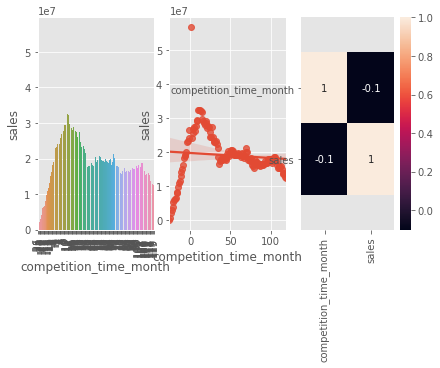

In [87]:
plt.subplot(1,3,1)
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[ ( aux1['competition_time_month'] < 120  ) &  ( aux1['competition_time_month'] != 0  ) ]
sns.barplot( x = 'competition_time_month' , y = 'sales' , data = aux2 );
plt.xticks( rotation = 90 );
plt.tight_layout()

plt.subplot(1,3,2)
sns.regplot( x = 'competition_time_month' , y = 'sales' , data = aux2 );

plt.subplot(1,3,3)
x = sns.heatmap( aux1.corr(method = 'pearson') , annot = True );

bottom , top = x.get_ylim()
x.set_ylim( bottom+0.5 , top-0.5 );

## 9.1. Análise Univariada

### 9.1.1 Variáveis numéricas

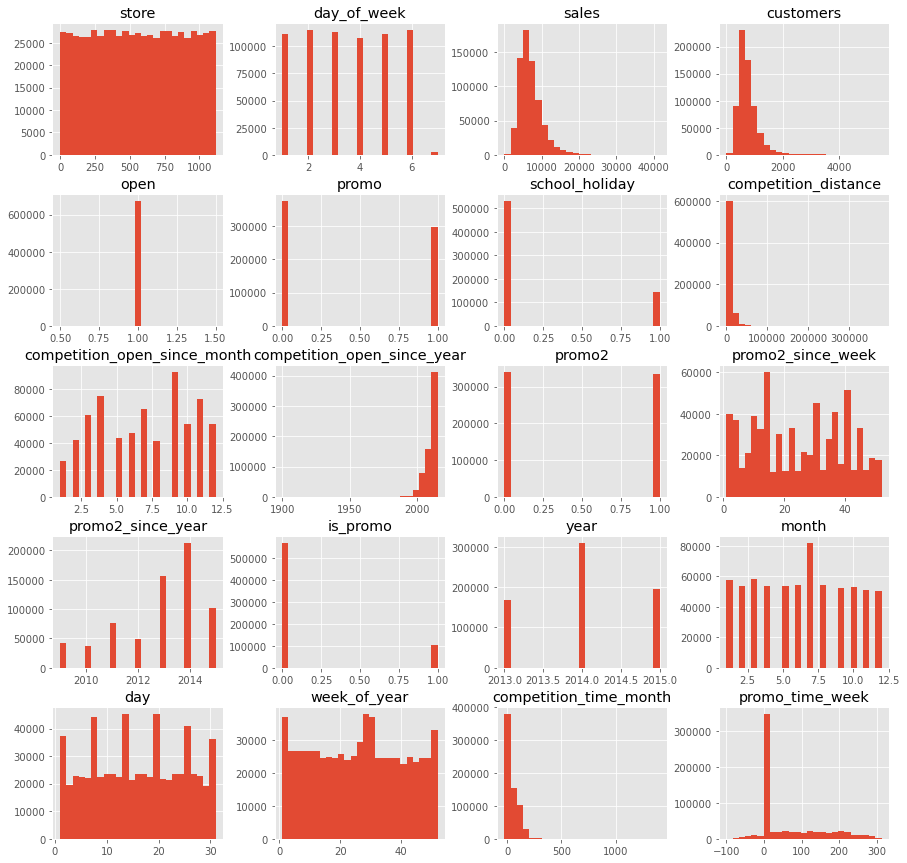

In [88]:
df4.hist(figsize=(15,15),bins=25);

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


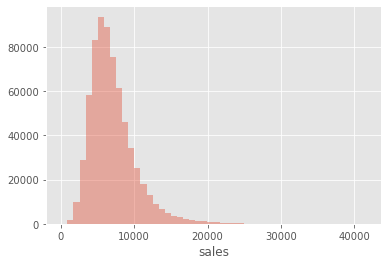

In [89]:
sns.distplot( df4['sales'] , kde = False)
plt.show()

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


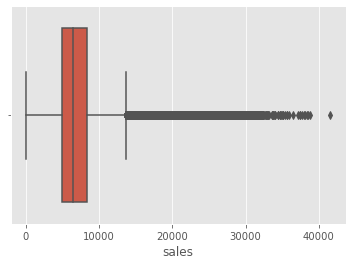

In [90]:
sns.boxplot( df4['sales']);
plt.show();

### 9.1.2. Variável Categórica

In [91]:
df4['state_holiday'].value_counts()

regular_day       674872
public_holiday       509
easter_holiday        98
christmas             71
Name: state_holiday, dtype: int64

In [92]:
df4[df4['state_holiday'] == 'christmas']['sales']

241126     9741
241267    17597
241270    32169
241281     7818
241298     1800
          ...  
617657    12223
617693    10033
617872     7138
618005     1929
618021     8890
Name: sales, Length: 71, dtype: int64

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


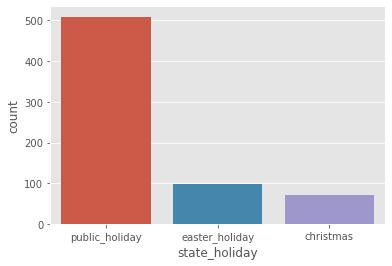

In [93]:
sns.countplot( df4['state_holiday'][df4['state_holiday'] != 'regular_day'] );

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


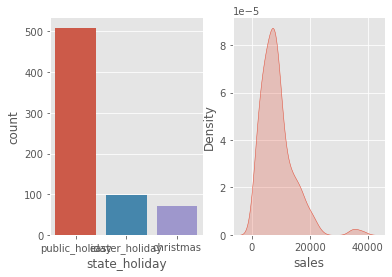

In [94]:
# Gráficos de state_holiday
plt.subplot( 1 , 2 , 1 )
sns.countplot( df4['state_holiday'][df4['state_holiday'] != 'regular_day'] );

plt.subplot( 1 , 2 , 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'] , label='public_holiday', shade=True );

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


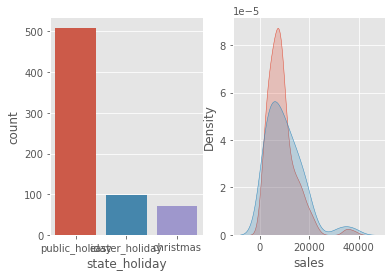

In [95]:
# Gráficos de state_holiday
plt.subplot( 1 , 2 , 1 )
sns.countplot( df4['state_holiday'][df4['state_holiday'] != 'regular_day'] );

plt.subplot( 1 , 2 , 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'] , label='public_holiday', shade=True );
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'] , label='easter_holiday', shade=True );

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


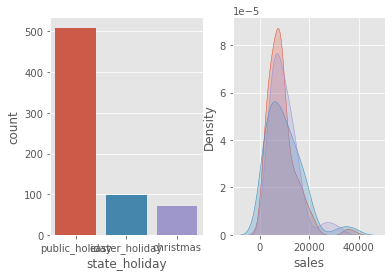

In [96]:
# Gráficos de state_holiday
plt.subplot( 1 , 2 , 1 )
sns.countplot( df4['state_holiday'][df4['state_holiday'] != 'regular_day'] );

plt.subplot( 1 , 2 , 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'] , label='public_holiday', shade=True );
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'] , label='easter_holiday', shade=True );
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'] , label='christmas', shade=True );

In [97]:
df4['store_type'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


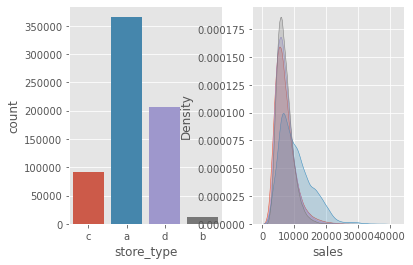

In [98]:
# Gráficos de Store_type
plt.subplot( 1 , 2 , 1 )
sns.countplot( df4['store_type'] );

plt.subplot( 1 , 2 , 2 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'] , label='a', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'] , label='b', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'] , label='c', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'] , label='d', shade=True );

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


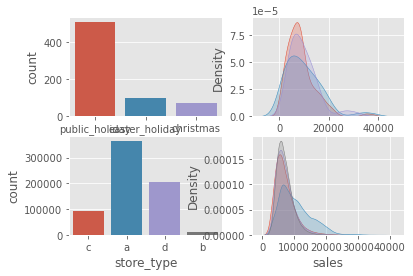

In [99]:
# Gráficos de state_holiday
plt.subplot( 2 , 2 , 1 )
sns.countplot( df4['state_holiday'][df4['state_holiday'] != 'regular_day'] );

plt.subplot( 2 , 2 , 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'] , label='public_holiday', shade=True );
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'] , label='easter_holiday', shade=True );
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'] , label='christmas', shade=True );

# Gráficos de Store_type
plt.subplot( 2 , 2 , 3 )
sns.countplot( df4['store_type'] );

plt.subplot( 2 , 2 , 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'] , label='a', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'] , label='b', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'] , label='c', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'] , label='d', shade=True );

C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\Data ScienceMeigarom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

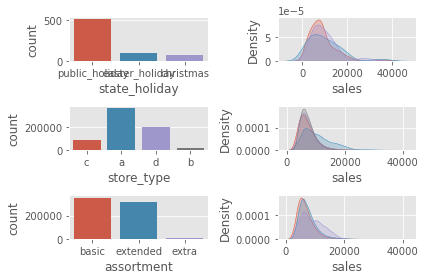

In [100]:
# Gráficos de state_holiday
plt.subplot( 3 , 2 , 1 )
sns.countplot( df4['state_holiday'][df4['state_holiday'] != 'regular_day'] );

plt.subplot( 3 , 2 , 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'] , label='public_holiday', shade=True );
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'] , label='easter_holiday', shade=True );
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'] , label='christmas', shade=True );

# Gráficos de Store_type
plt.subplot( 3 , 2 , 3 )
sns.countplot( df4['store_type'] );

plt.subplot( 3 , 2 , 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'] , label='a', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'] , label='b', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'] , label='c', shade=True );
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'] , label='d', shade=True );

# Gráficos de assortment
plt.subplot( 3 , 2 , 5 )
sns.countplot( df4['assortment'] );

plt.subplot( 3 , 2 , 6 )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'] , label='basic', shade=True );
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'] , label='extended', shade=True );
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'] , label='extra', shade=True );

plt.tight_layout()

In [101]:
df4['assortment'].unique()

array(['basic', 'extended', 'extra'], dtype=object)

## 9.2. Análise Bivariada

### Hipótese: lojas com maior variedade deveriam vender mais

In [102]:
plt.style.use('ggplot')

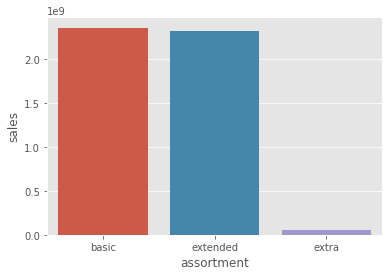

In [103]:
aux1 = df4[['assortment','sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot(x = 'assortment', y = 'sales',data = aux1)
plt.show()

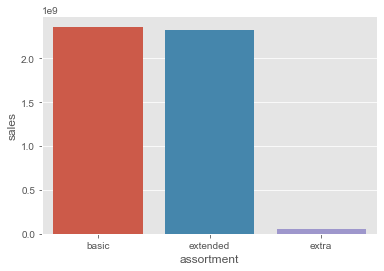

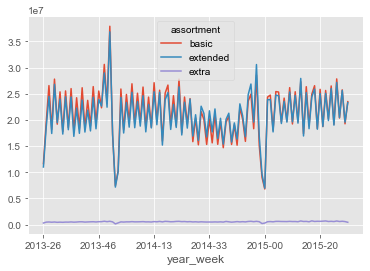

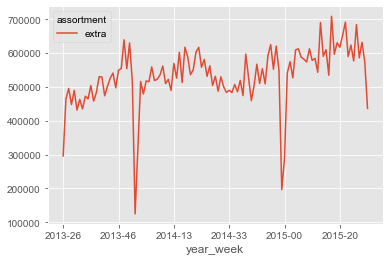

In [104]:
#plt.subplot( 1 , 2 , 1 )
aux1 = df4[['assortment','sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot(x = 'assortment', y = 'sales', data = aux1)

#plt.subplot( 1 , 2 , 2 )
aux2 = df4[['year_week','assortment','sales']].groupby( [ 'year_week' , 'assortment' ] ).sum().reset_index()
aux2.pivot( index='year_week' , columns = 'assortment' , values = 'sales' ).plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week' , columns = 'assortment' , values = 'sales' ).plot()

sns.set( rc = {'figure.figsize':(15,10)} )

## Conclusão: a variedade de produtos não interfere na quantidade de vendas

### Hipótese: lojas com competidores mais próximos deveriam vender menos

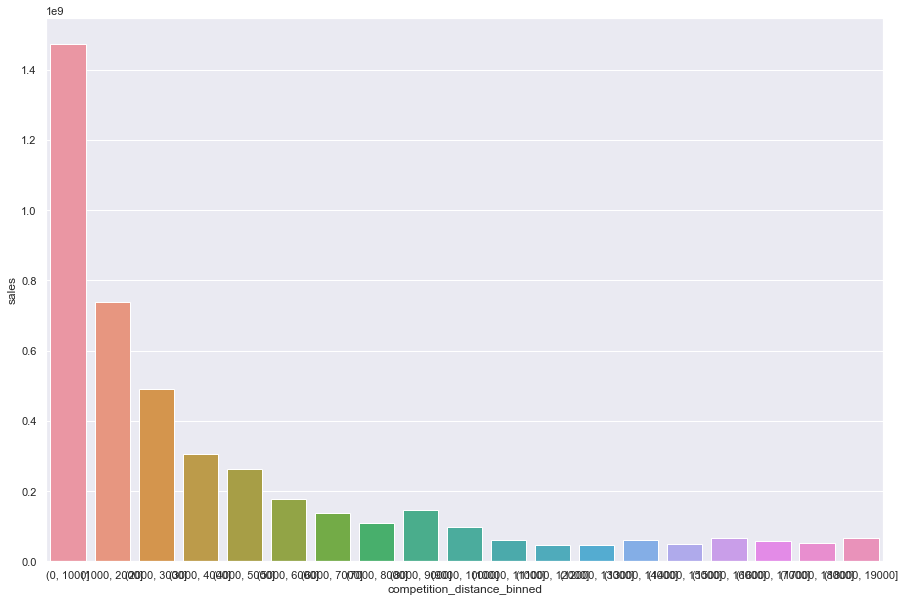

In [105]:
aux1 = df4[['competition_distance','sales']].groupby( 'competition_distance' ).sum().reset_index()

bins = list( np.arange( 0, 20000 , 1000 ) )

aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'] , bins = bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

sns.barplot( x = 'competition_distance_binned', y = 'sales' , data = aux2.sort_values(by='sales') );

## 9.3. Análise Multivariada

In [106]:
df4.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


In [107]:
(df4[['promo_time_week','sales']] < 0).sum()

promo_time_week    31295
sales                  0
dtype: int64

In [108]:
(df4['promo_time_week'] > 0).sum()

31295

In [109]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

## Lojas com promoções ativas por mais tempo deveriam vender mais

## data da venda - data da promo2 (extendida) < 0 : período de promoção tradicional
## data da venda - data da promo2 (extendida) > 0 : período de promoção extendida

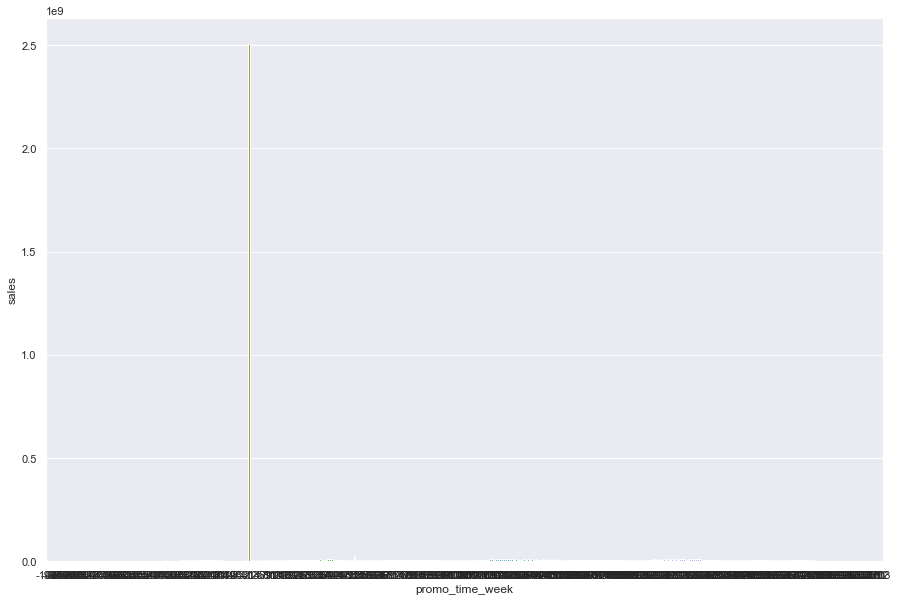

In [111]:
aux1 = df4[['promo_time_week','sales']].groupby( 'promo_time_week' ).sum().reset_index()
sns.barplot(data=aux1,x='promo_time_week',y='sales');


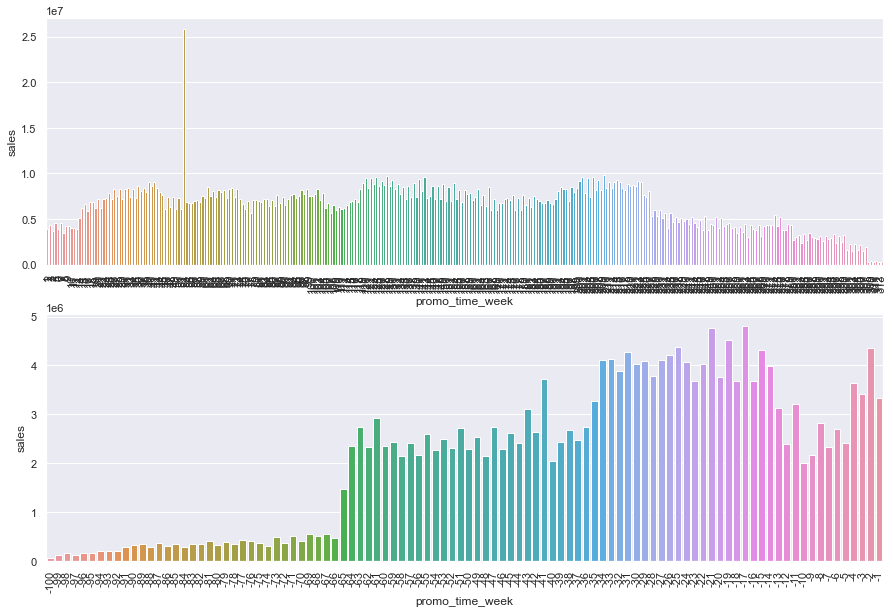

In [112]:
plt.subplot(2,1,1)
aux2 = aux1[aux1['promo_time_week'] > 0] # período tradicional de promoção
sns.barplot(data=aux2,x='promo_time_week',y='sales');
plt.xticks(rotation=90);

plt.subplot(2,1,2)
aux3 = aux1[aux1['promo_time_week'] < 0] # período extendido de promoção
sns.barplot(data=aux3,x='promo_time_week',y='sales');
plt.xticks(rotation=90);

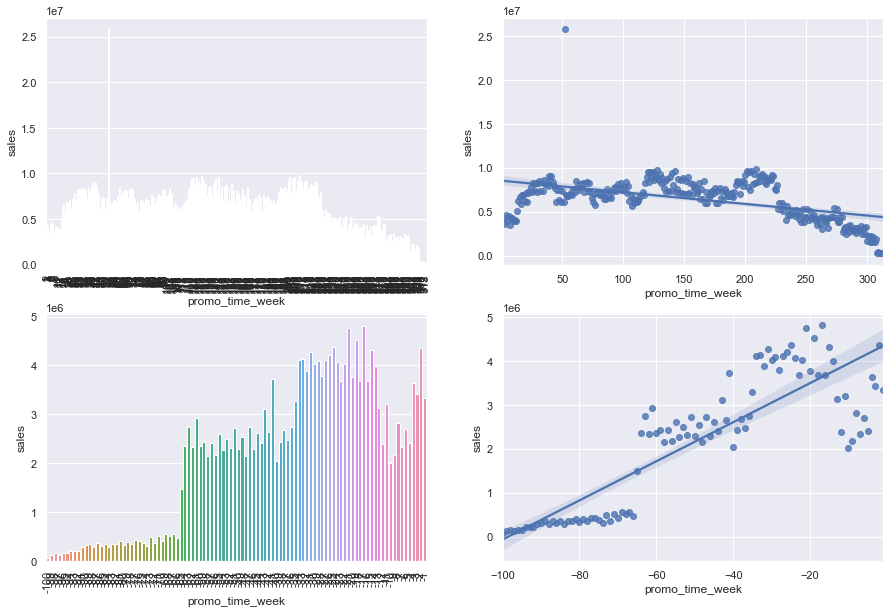

In [113]:
plt.subplot(2,2,1)
aux2 = aux1[aux1['promo_time_week'] > 0] # período tradicional de promoção
sns.barplot(data=aux2,x='promo_time_week',y='sales');
plt.xticks(rotation=90);

plt.subplot(2,2,2);
sns.regplot(data=aux2,x='promo_time_week',y='sales');

plt.subplot(2,2,3)
aux3 = aux1[aux1['promo_time_week'] < 0] # período extendido de promoção
sns.barplot(data=aux3,x='promo_time_week',y='sales');
plt.xticks(rotation=90);

plt.subplot(2,2,4);
sns.regplot(data=aux3,x='promo_time_week',y='sales');

In [116]:
import matplotlib.gridspec as gridspec

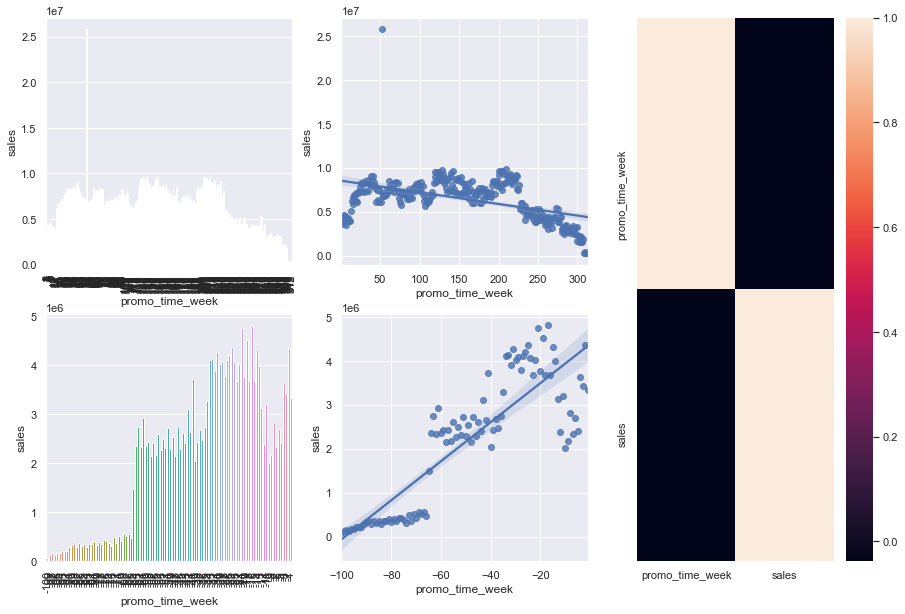

In [120]:
grid = gridspec.GridSpec( 2, 3 )

plt.subplot(grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0] # período tradicional de promoção
sns.barplot(data=aux2,x='promo_time_week',y='sales');
plt.xticks(rotation=90);

plt.subplot(grid[0,1])
sns.regplot(data=aux2,x='promo_time_week',y='sales');

plt.subplot(grid[1,0])
aux3 = aux1[aux1['promo_time_week'] < 0] # período extendido de promoção
sns.barplot(data=aux3,x='promo_time_week',y='sales');
plt.xticks(rotation=90);

plt.subplot(grid[1,1])
sns.regplot(data=aux3,x='promo_time_week',y='sales');

plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'));

## Lojas com promoções consecutivas deveriam vender mais

In [124]:
aux1 = df4[['promo','promo2','sales']].groupby( ['promo','promo2'] ).sum().reset_index()
aux1.sort_values(by='sales')

,promo,promo2,sales
1,0,1,1043317100
3,1,1,1177028525
0,0,0,1210010537
2,1,0,1312280502


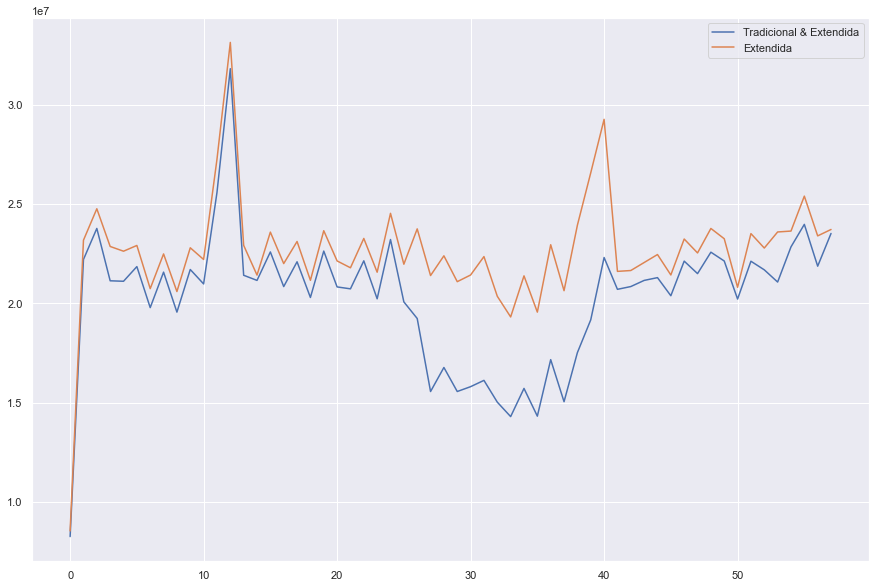

In [138]:
aux1 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week','sales']].groupby( 'year_week' ).sum().reset_index();
ax = aux1.plot();

aux2 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week','sales']].groupby( 'year_week' ).sum().reset_index();
aux2.plot(ax=ax);

ax.legend( labels = ['Tradicional & Extendida', 'Extendida'] );

## Lojas abertas durante o feriado de natal deveriam vender mais

In [143]:
df4[['state_holiday','sales']].groupby( 'state_holiday' ).sum()

,sales
state_holiday,
christmas,691806
easter_holiday,978747
public_holiday,4409812
regular_day,4736556299


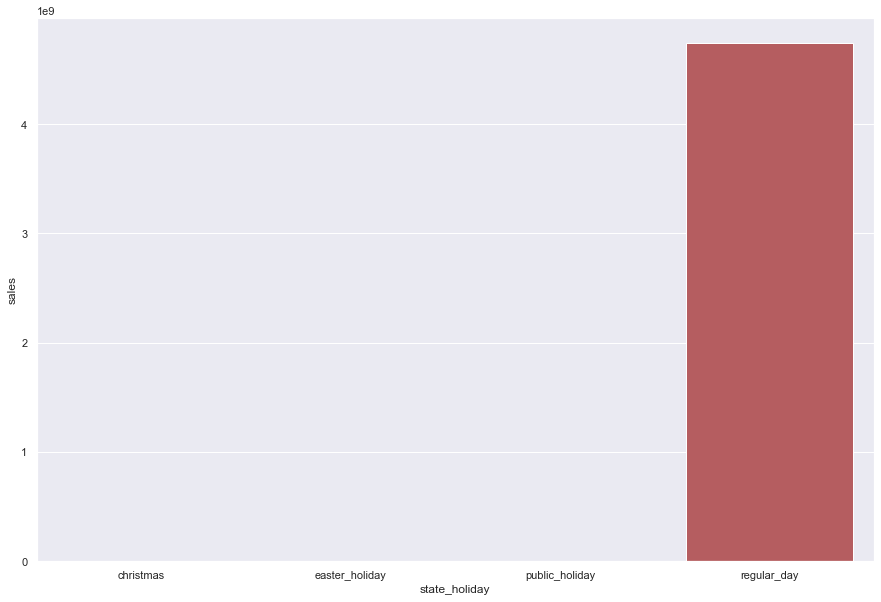

In [144]:
aux1 = df4[['state_holiday','sales']].groupby( 'state_holiday' ).sum().reset_index();
sns.barplot( x = 'state_holiday' , y = 'sales' , data=aux1);

## Retirando os regular_days pra poder enxergar as outras variáveis que estavam sendo engolidas no outro gráfico

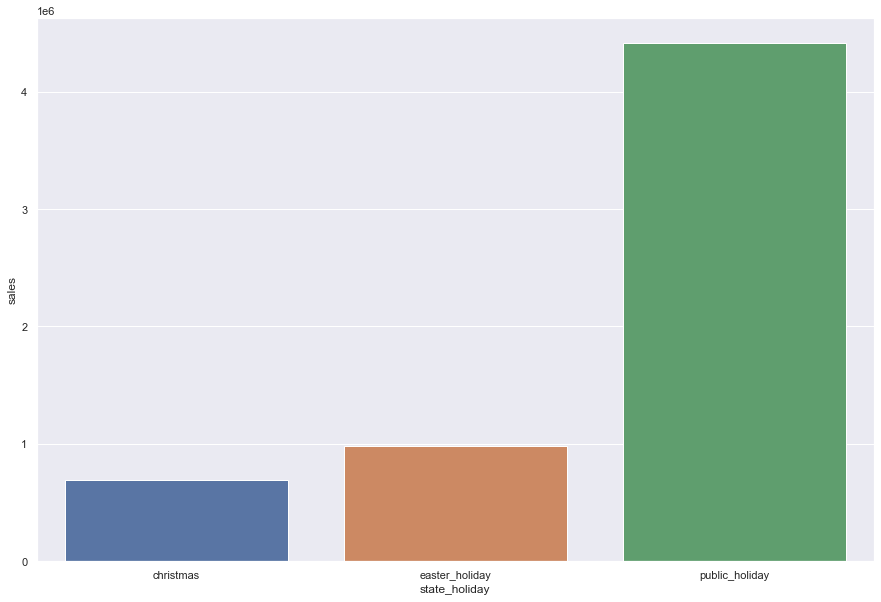

In [148]:
aux = df4[ df4['state_holiday'] != 'regular_day' ]
aux1 = aux[['state_holiday','sales']].groupby( 'state_holiday' ).sum().reset_index();
sns.barplot( x = 'state_holiday' , y = 'sales' , data=aux1);

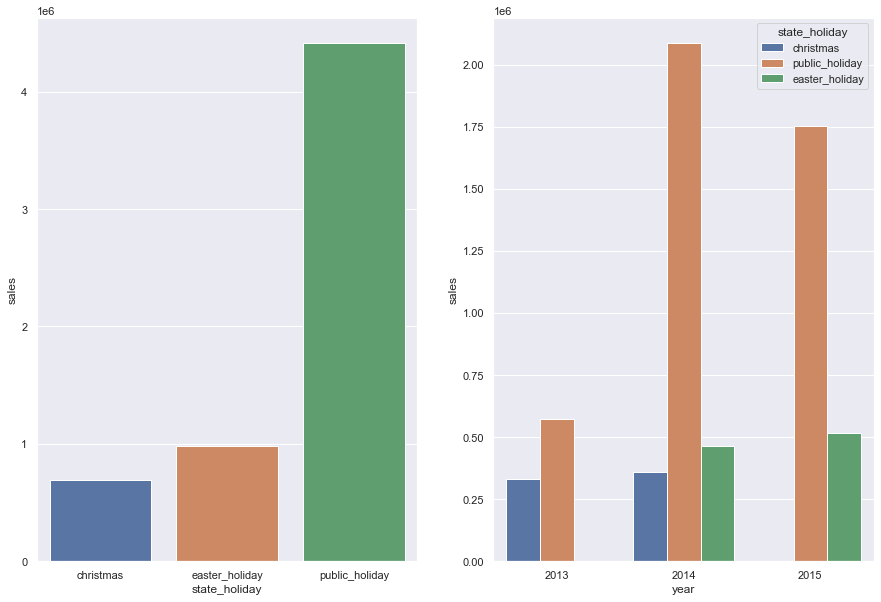

In [156]:
plt.subplot(1 , 2 , 1)
aux = df4[ df4['state_holiday'] != 'regular_day' ];
aux1 = aux[['state_holiday','sales']].groupby( 'state_holiday' ).sum().reset_index();
sns.barplot( x = 'state_holiday' , y = 'sales' , data=aux1);

plt.subplot(1 , 2 , 2)
aux2 = aux[['year','state_holiday','sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index();
sns.barplot(x='year',y='sales',hue='state_holiday',data=aux2);

## Lojas deveriam vender mais ao longo dos anos

## 4.3. Análise Multivariada